<a href="https://colab.research.google.com/github/danielscp/semantic_lexical_lir/blob/master/Models_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Does semantic search performs better than lexical search in the task of assisting legal opinion writing?

## Installing libraries and configuring environment

In [0]:
!pip install Orange3

     |████████████████████████████████| 2.6MB 2.8MB/s 
     |████████████████████████████████| 839kB 29.5MB/s 
     |████████████████████████████████| 143kB 38.3MB/s 
     |████████████████████████████████| 1.6MB 30.6MB/s 
     |████████████████████████████████| 51kB 18.9MB/s 
     |████████████████████████████████| 2.3MB 32.7MB/s 
     |████████████████████████████████| 61kB 22.9MB/s 
     |████████████████████████████████| 102kB 28.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/82/66/5c/ff15e5b7c0fd8cf975379e972826fd51201ba12701688656c3
  Stored in directory: /root/.cache/pip/wheels/93/a2/de/184ecdefdb91d760706d02389015dfa3b96e927eb1c42ace37
  Stored in directory: /root/.cache/pip/wheels/60/e5/74/d6859d4e5fb6968bc38576bf2520fe20509600741c49605067
  Stored in directory: /root/.cache/pip/wheels/c2/dc/94/2055c891994f758c6453808c69b6ce852672e5e9c426c56717
Successfully built openTSNE pyqtgraph serverfiles pynndescent


In [0]:
!pip install -U -q PyDrive

     |████████████████████████████████| 993kB 3.4MB/s 


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
import matplotlib.pyplot as plt
import Orange
import pandas as pd

In [0]:
%matplotlib inline

In [0]:
#Utility function to grab Google Drive files...
def load_from_drive(id, name):
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(name)  
  
#Function for plotting models comparison
def compare_models(df_models_scores):
  avranks = df_models_scores.rank(axis=1, ascending=False, method='average').mean().values
  names = [n for n in df_pcrim_pure.columns[1:]]
  cd = Orange.evaluation.compute_CD(avranks, 30) #tested on 30 queries
  Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5)

In [0]:
#Utility function to plot enrichment methods comparison
def plot_enrich_comparison(df_basic, df_matter, df_citation, df_matter_citation):
  dfs = [df_basic, df_matter, df_citation, df_matter_citation]
  methods = ['Basic', 'Matter', 'Citation', 'Matter & Citation']
  df = pd.DataFrame([ds.mean() for ds in dfs], index=methods)
  line_style=[':', ':'] + ['-.' for i in range(8)] + ['-' for i in range(8)]
  df.plot(style=line_style).legend(bbox_to_anchor=(1.2, 1.2))
  plt.ylabel('NDCG')
  plt.xlabel('Rank modification method')
  return df

## Criminal Prosecution Office Corpus assesment

### Loading models NDCG score datasets

In [0]:
datasets = [
    ('1cbyXu4yaMv8ggGyETownqFqyzRl4m0uf', 'pcrim_score_pure_20.csv'),
    ('1zgx1pmrn4BEL-Zzvp7Pqb7PH2E8oQ8sO', 'pcrim_score_matter_20.csv'),
    ('1CmGtMn_zIxhOyb6uGaF_zkRNArgVlpGZ', 'pcrim_score_citation_20.csv'),
    ('1nVv477pv5Pe1LE3WTgQU7nzyvw0Seuwa', 'pcrim_score_matter_citation_20.csv'),

]

for d in datasets:
  load_from_drive(*d)

In [0]:
df_pcrim_pure = pd.read_csv('pcrim_score_pure_20.csv')
df_pcrim_pure.head()

,q,bm25,tfidf,lsi_50,lsi_100,lsi_150,lsi_200,lsi_250,lsi_300,lsi_350,lsi_400,lda_50,lda_100,lda_150,lda_200,lda_250,lda_300,lda_350,lda_400
0,q0,0.548068,0.576412,0.493933,0.461191,0.491359,0.000000,0.000000,0.000000,0.000000,0.000000,0.107468,0.160808,0.161649,0.000000,0.000000,0.0000,0.0,0.033515
1,q1,0.925279,0.852397,0.886787,0.887899,0.888584,0.035704,0.035704,0.000000,0.000000,0.000000,0.922187,0.906924,0.903619,0.138703,0.132466,0.0664,0.0,0.000000
2,q10,0.134061,0.057737,0.000000,0.019376,0.018698,0.000000,0.000000,0.000000,0.000000,0.000000,0.078458,0.042291,0.000000,0.000000,0.000000,0.0000,0.0,0.000000
3,q11,0.938003,0.873358,0.917476,0.917515,0.918200,0.000000,0.000000,0.000000,0.000000,0.000000,0.922187,0.906924,0.903619,0.016809,0.102531,0.0000,0.0,0.000000
4,q12,0.775829,0.670887,0.672859,0.667374,0.647724,0.018402,0.018402,0.016886,0.016886,0.016886,0.833291,0.944375,0.897169,0.016492,0.000000,0.0000,0.0,0.051500


### Comparing pure models

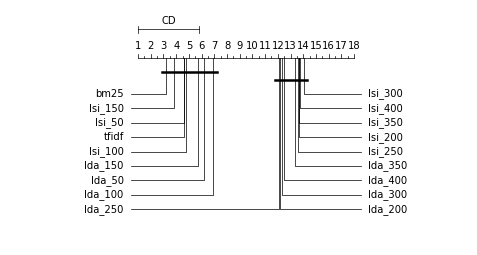

In [0]:
compare_models(df_pcrim_pure)

### Comparing models with matter enrichment

In [0]:
df_pcrim_matter = pd.read_csv('pcrim_score_matter_20.csv')
df_pcrim_matter.head()

,q,bm25,tfidf,lsi_50,lsi_100,lsi_150,lsi_200,lsi_250,lsi_300,lsi_350,lsi_400,lda_50,lda_100,lda_150,lda_200,lda_250,lda_300,lda_350,lda_400
0,q0,0.667803,0.616077,0.505859,0.468507,0.495726,0.079001,0.086111,0.150341,0.086710,0.115748,0.232524,0.170361,0.169943,0.449326,0.338195,0.287775,0.262456,0.393845
1,q1,0.925279,0.852397,0.886787,0.887899,0.888584,0.035704,0.035704,0.000000,0.000000,0.000000,0.922187,0.906924,0.903619,0.138703,0.132466,0.068315,0.000000,0.000000
2,q10,0.548869,0.480655,0.549738,0.544026,0.500394,0.202104,0.318053,0.209377,0.249555,0.216434,0.490575,0.461172,0.573238,0.301437,0.324068,0.331470,0.280951,0.357436
3,q11,0.938003,0.873358,0.917476,0.917515,0.918200,0.000000,0.000000,0.000000,0.000000,0.000000,0.922187,0.906924,0.903619,0.097139,0.102531,0.000000,0.000000,0.000000
4,q12,0.849240,0.814769,0.785934,0.808560,0.832769,0.174056,0.183079,0.183079,0.180061,0.177703,0.892816,0.944375,0.897169,0.115751,0.052482,0.107592,0.111123,0.131938


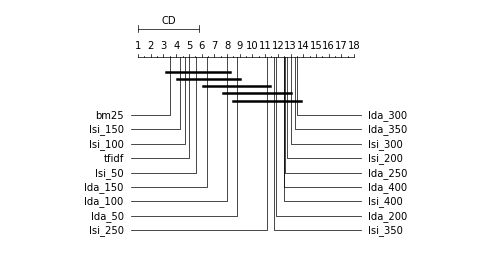

In [0]:
compare_models(df_pcrim_matter)

### Comparing models with legal citation enrichment

In [0]:
df_pcrim_citation = pd.read_csv('pcrim_score_citation_20.csv')
df_pcrim_citation.head()

,q,bm25,tfidf,lsi_50,lsi_100,lsi_150,lsi_200,lsi_250,lsi_300,lsi_350,lsi_400,lda_50,lda_100,lda_150,lda_200,lda_250,lda_300,lda_350,lda_400
0,q0,0.593948,0.647607,0.542399,0.458011,0.500876,0.000000,0.000000,0.000000,0.000000,0.031019,0.217432,0.219821,0.634070,0.158195,0.082067,0.062801,0.10549,0.123802
1,q1,0.925279,0.852397,0.886787,0.887899,0.888584,0.035704,0.035704,0.000000,0.000000,0.000000,0.922187,0.906924,0.903619,0.136416,0.067704,0.068315,0.00000,0.000000
2,q10,0.289377,0.182609,0.054587,0.061272,0.073183,0.031019,0.111309,0.065333,0.069744,0.090180,0.213680,0.000000,0.071375,0.151218,0.042291,0.067030,0.06703,0.089374
3,q11,0.938003,0.873358,0.917476,0.917515,0.918200,0.000000,0.000000,0.000000,0.000000,0.000000,0.922187,0.906924,0.903619,0.016809,0.102531,0.000000,0.00000,0.000000
4,q12,0.889690,0.869142,0.876907,0.878281,0.879181,0.481721,0.492835,0.493639,0.493012,0.526025,0.899912,0.944375,0.897169,0.474360,0.322260,0.514609,0.52691,0.493865


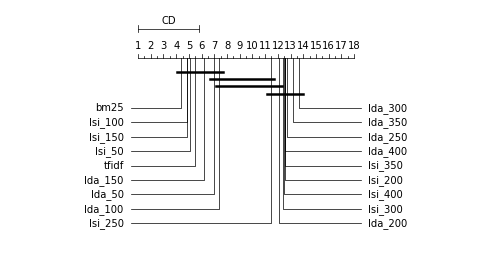

In [0]:
compare_models(df_pcrim_citation)

### Comparing models with matter and legal citation enrichment

In [0]:
df_pcrim_matter_citation = pd.read_csv('pcrim_score_matter_citation_20.csv')
df_pcrim_matter_citation.head()

,q,bm25,tfidf,lsi_50,lsi_100,lsi_150,lsi_200,lsi_250,lsi_300,lsi_350,lsi_400,lda_50,lda_100,lda_150,lda_200,lda_250,lda_300,lda_350,lda_400
0,q0,0.667803,0.647607,0.542399,0.458011,0.500876,0.171474,0.179045,0.162773,0.157920,0.165292,0.184643,0.219821,0.184659,0.484491,0.421536,0.401594,0.324927,0.446669
1,q1,0.925279,0.852397,0.886787,0.887899,0.888584,0.035704,0.035704,0.000000,0.000000,0.000000,0.922187,0.906924,0.903619,0.138703,0.030132,0.000000,0.000000,0.017295
2,q10,0.657684,0.551363,0.612908,0.587524,0.519936,0.316528,0.499373,0.343138,0.336028,0.341914,0.522901,0.525018,0.557892,0.390117,0.395796,0.420212,0.357589,0.393055
3,q11,0.938003,0.873358,0.917476,0.917515,0.918200,0.000000,0.000000,0.000000,0.000000,0.000000,0.922187,0.906924,0.903619,0.097139,0.063999,0.000000,0.000000,0.000000
4,q12,0.909207,0.869142,0.862199,0.893545,0.894445,0.656740,0.639025,0.605507,0.618471,0.639652,0.924191,0.944375,0.897169,0.586102,0.499015,0.663691,0.622068,0.578016


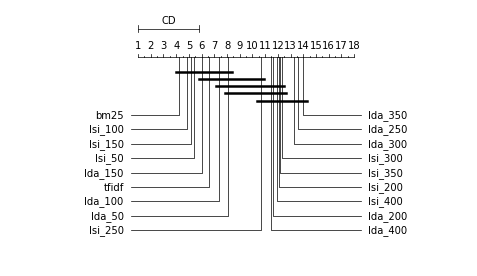

In [0]:
compare_models(df_pcrim_matter_citation)

### Assessing enrichment method performance impact

,bm25,tfidf,lsi_50,lsi_100,lsi_150,lsi_200,lsi_250,lsi_300,lsi_350,lsi_400,lda_50,lda_100,lda_150,lda_200,lda_250,lda_300,lda_350,lda_400
Basic,0.711535,0.655967,0.618804,0.639070,0.670337,0.032555,0.030756,0.023317,0.025791,0.023803,0.447925,0.475935,0.560189,0.080157,0.091021,0.073002,0.027018,0.079508
Matter,0.680252,0.642955,0.618588,0.640487,0.654122,0.243056,0.266322,0.234691,0.249966,0.243076,0.477644,0.507676,0.569139,0.254043,0.232535,0.218163,0.211749,0.241383
Citation,0.688419,0.661125,0.665769,0.675445,0.672546,0.315246,0.348526,0.310051,0.310836,0.308018,0.519018,0.596331,0.643028,0.334889,0.305436,0.279439,0.281678,0.306646
Matter & Citation,0.643221,0.619830,0.619556,0.629369,0.621719,0.373473,0.399222,0.368404,0.370462,0.380988,0.527282,0.570578,0.602121,0.388390,0.334187,0.372565,0.327059,0.399155


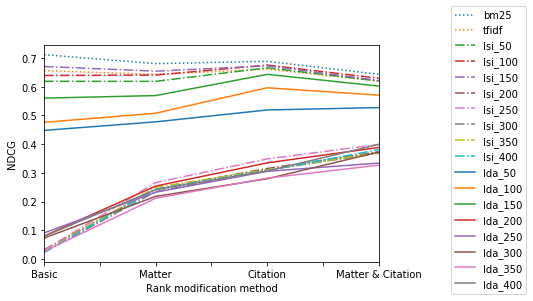

In [0]:
plot_enrich_comparison(df_pcrim_pure, df_pcrim_matter, df_pcrim_citation, df_pcrim_matter_citation)

In this corpus, rank modification methods increased NDCG for models which pure version was low. For the group of best performing models, rank modification methods has no influence, and in some cases, decreases the performance.

# Specialized Criminal Prosecution Office Corpus assesment

## Pure models comparison

### Loading models NDCG score datasets

In [0]:

 
datasets = [
    ('1kRZ-n-8UHu5PyI5nqJd6HD0csUnSvj5j', 'pcrimesp_score_pure_20.csv'),
    ('1zgx1pmrn4BEL-Zzvp7Pqb7PH2E8oQ8sO', 'pcrimesp_score_matter_20.csv'),
    ('1y0TFf4wkPz7W9kH0un0VkJfg-Or5I_hO', 'pcrimesp_score_citation_20.csv'),
    ('1veyee2MT5ghAMrgZ8g9Rd4d0Zg7WErj1', 'pcrimesp_score_matter_citation_20.csv'),

]

for d in datasets:
  load_from_drive(*d)
  


### Comparing pure models

In [0]:
df_pcrimesp_pure = pd.read_csv('pcrimesp_score_pure_20.csv')
df_pcrimesp_pure.head()

,q,bm25,tfidf,lsi_50,lsi_100,lsi_150,lsi_200,lsi_250,lsi_300,lsi_350,lsi_400,lda_50,lda_100,lda_150,lda_200,lda_250,lda_300,lda_350,lda_400
0,q0,0.973745,0.917345,0.936562,0.970411,0.972016,0.949126,0.956725,0.942796,0.942796,0.942796,0.846914,0.987511,0.990288,0.969424,0.981364,0.985602,0.942710,0.932209
1,q1,0.805115,0.919601,0.809300,0.897626,0.899563,0.915234,0.905326,0.917182,0.903069,0.917639,0.609170,0.427563,0.706273,0.497639,0.625240,0.717290,0.683689,0.687216
2,q10,0.955069,0.871848,0.936562,0.926377,0.926377,0.900640,0.869574,0.907685,0.890558,0.901004,0.846914,0.987511,0.990288,0.967819,0.981364,0.984764,0.942710,0.887278
3,q11,0.842762,0.872553,0.847051,0.809277,0.816760,0.828417,0.813632,0.851882,0.856157,0.864858,0.600279,0.622978,0.718603,0.803196,0.709260,0.672907,0.657633,0.645412
4,q12,0.526683,0.575371,0.575278,0.721814,0.665775,0.633970,0.622156,0.607875,0.569219,0.568495,0.322912,0.285639,0.131816,0.256167,0.058457,0.198686,0.261808,0.286278


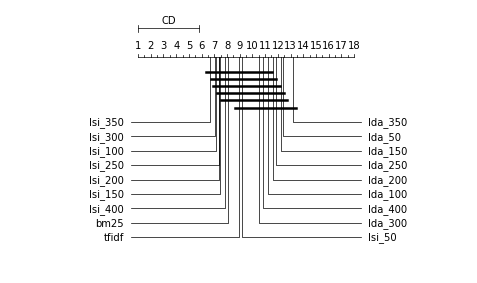

In [0]:
compare_models(df_pcrimesp_pure)

###Comparing models with matter enrichment

In [0]:
df_pcrimesp_matter = pd.read_csv('pcrimesp_score_matter_20.csv')
df_pcrimesp_matter.head()

,q,bm25,tfidf,lsi_50,lsi_100,lsi_150,lsi_200,lsi_250,lsi_300,lsi_350,lsi_400,lda_50,lda_100,lda_150,lda_200,lda_250,lda_300,lda_350,lda_400
0,q0,0.667803,0.616077,0.505859,0.468507,0.495726,0.079001,0.086111,0.150341,0.086710,0.115748,0.232524,0.170361,0.169943,0.449326,0.338195,0.287775,0.262456,0.393845
1,q1,0.925279,0.852397,0.886787,0.887899,0.888584,0.035704,0.035704,0.000000,0.000000,0.000000,0.922187,0.906924,0.903619,0.138703,0.132466,0.068315,0.000000,0.000000
2,q10,0.548869,0.480655,0.549738,0.544026,0.500394,0.202104,0.318053,0.209377,0.249555,0.216434,0.490575,0.461172,0.573238,0.301437,0.324068,0.331470,0.280951,0.357436
3,q11,0.938003,0.873358,0.917476,0.917515,0.918200,0.000000,0.000000,0.000000,0.000000,0.000000,0.922187,0.906924,0.903619,0.097139,0.102531,0.000000,0.000000,0.000000
4,q12,0.849240,0.814769,0.785934,0.808560,0.832769,0.174056,0.183079,0.183079,0.180061,0.177703,0.892816,0.944375,0.897169,0.115751,0.052482,0.107592,0.111123,0.131938


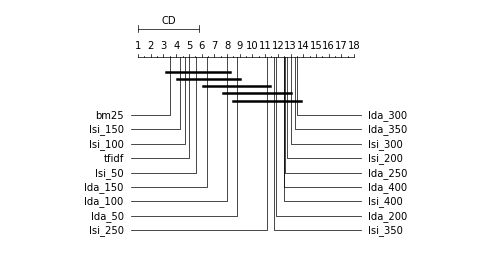

In [0]:
compare_models(df_pcrimesp_matter)

### Comparing models with legal citation enrichment

In [0]:
df_pcrimesp_citation = pd.read_csv('pcrimesp_score_citation_20.csv')
df_pcrimesp_citation.head()

,q,bm25,tfidf,lsi_50,lsi_100,lsi_150,lsi_200,lsi_250,lsi_300,lsi_350,lsi_400,lda_50,lda_100,lda_150,lda_200,lda_250,lda_300,lda_350,lda_400
0,q0,0.833250,0.871543,0.837894,0.833691,0.833691,0.873704,0.830973,0.873873,0.873873,0.873873,0.871126,0.840995,0.886635,0.875628,0.837894,0.883585,0.840995,0.837894
1,q1,0.805115,0.920450,0.900692,0.931444,0.946628,0.950273,0.951700,0.952383,0.937806,0.968934,0.574906,0.575203,0.706273,0.590076,0.654585,0.709163,0.682225,0.690104
2,q10,0.827092,0.796467,0.837894,0.833691,0.833691,0.829670,0.829670,0.832417,0.829839,0.828183,0.871126,0.840995,0.886635,0.831594,0.837894,0.883585,0.840995,0.723401
3,q11,0.840669,0.901003,0.906703,0.896394,0.907348,0.878332,0.877740,0.877249,0.876880,0.883545,0.583887,0.631963,0.718603,0.803196,0.694558,0.688697,0.672699,0.645412
4,q12,0.391748,0.559381,0.505926,0.587999,0.551402,0.536723,0.522478,0.516309,0.506775,0.506472,0.186969,0.204084,0.208895,0.143606,0.156009,0.258579,0.154251,0.167114


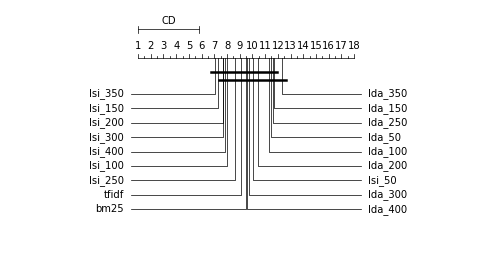

In [0]:
compare_models(df_pcrimesp_citation)

### Comparing models with matter and legal citation enrichment

In [0]:
df_pcrimesp_matter_citation = pd.read_csv('pcrimesp_score_matter_citation_20.csv')
df_pcrimesp_matter_citation.head()

,q,bm25,tfidf,lsi_50,lsi_100,lsi_150,lsi_200,lsi_250,lsi_300,lsi_350,lsi_400,lda_50,lda_100,lda_150,lda_200,lda_250,lda_300,lda_350,lda_400
0,q0,0.833250,0.827390,0.837894,0.833691,0.833691,0.829670,0.830973,0.830973,0.830973,0.830973,0.829670,0.840995,0.840995,0.831594,0.837894,0.839551,0.840995,0.837894
1,q1,0.780145,0.935910,0.934382,0.931444,0.946628,0.950273,0.951700,0.952383,0.967961,0.968934,0.624940,0.605248,0.671288,0.682929,0.670207,0.678847,0.728950,0.699623
2,q10,0.828226,0.800518,0.837894,0.833691,0.833691,0.829670,0.829670,0.832417,0.830973,0.829316,0.829670,0.840995,0.840995,0.831594,0.837894,0.839551,0.840995,0.723754
3,q11,0.918612,0.984652,0.944441,0.941623,0.944106,0.917531,0.916807,0.918017,0.920302,0.927579,0.616166,0.717723,0.734118,0.830436,0.711313,0.722360,0.645237,0.667777
4,q12,0.330145,0.525720,0.510094,0.548974,0.512748,0.511006,0.491020,0.481549,0.472423,0.471293,0.117499,0.230518,0.133370,0.082121,0.235335,0.078333,0.085390,0.090920


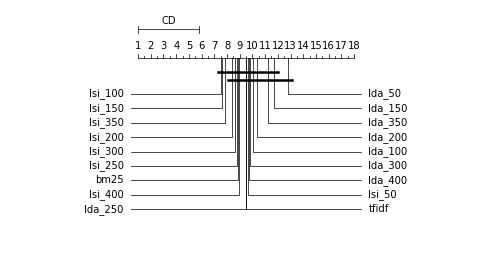

In [0]:
compare_models(df_pcrimesp_matter_citation)

###Assessing the impact of enrichment methods

,bm25,tfidf,lsi_50,lsi_100,lsi_150,lsi_200,lsi_250,lsi_300,lsi_350,lsi_400,lda_50,lda_100,lda_150,lda_200,lda_250,lda_300,lda_350,lda_400
Basic,0.746404,0.693556,0.611530,0.717523,0.726735,0.712985,0.734937,0.731479,0.749510,0.737584,0.492379,0.532148,0.485650,0.534616,0.528907,0.542536,0.447853,0.544976
Matter,0.680252,0.642955,0.618588,0.640487,0.654122,0.243056,0.266322,0.234691,0.249966,0.243076,0.477644,0.507676,0.569139,0.254043,0.232535,0.218163,0.211749,0.241383
Citation,0.704031,0.697098,0.649060,0.713103,0.724588,0.722218,0.715293,0.718804,0.725466,0.718295,0.583701,0.588869,0.613947,0.633325,0.624143,0.615006,0.579774,0.652079
Matter & Citation,0.698462,0.686063,0.649023,0.704792,0.708721,0.705734,0.702497,0.702442,0.708268,0.700944,0.565785,0.611252,0.606314,0.634972,0.641950,0.629909,0.596248,0.647678


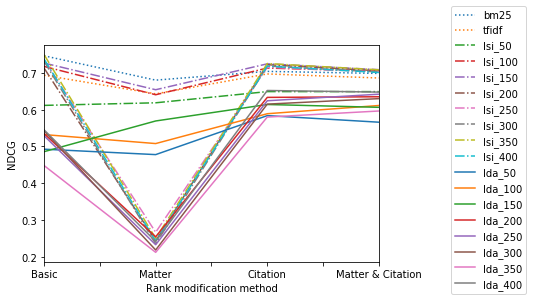

In [0]:
plot_enrich_comparison(df_pcrimesp_pure, df_pcrimesp_matter, df_pcrimesp_citation, df_pcrimesp_matter_citation)

In this corpus, the matter rank modification method decreased the NDCG of models which basic version was performing very well. This is the case for semantic models with k>150.  In this collection 

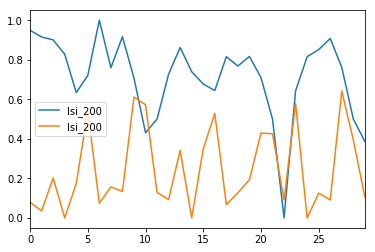

In [0]:
pd.DataFrame([df_pcrimesp_pure.lsi_200, df_pcrimesp_matter.lsi_200]).T.plot()

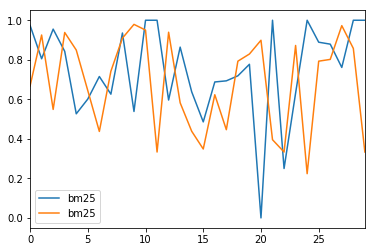

In [0]:
pd.DataFrame([df_pcrimesp_pure.bm25, df_pcrimesp_matter.bm25]).T.plot()